# Extracting features for correlation
In this exercise, you'll work with a version of the `salaries` dataset containing a new column called `"date_of_response"`.

The dataset has been read in as a pandas DataFrame, with `"date_of_response"` as a `datetime` data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

Seaborn has been imported for you as `sns`, `pandas` as `pd`, and `matplotlib.pyplot` as `plt`.

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

salaries= pd.read_excel(r"D:\Cursos\Data_Science_Python\data_sets\salaries_clean.xlsx")
salaries.date_of_response = pd.to_datetime(salaries.date_of_response,dayfirst=True)

#conditions fo job category
Job_Category = ['Machine Learning','Data Engineering','Data Analytics', 'Data Science', 'Other','Managerial']

Machine_Learning = ['Machine Learning Scientist', 'Machine Learning Engineer','Machine Learning Manager', 'AI Scientist', 'ML Engineer' ,'Applied Machine Learning Scientist' ,'Head of Machine Learning', 'Machine Learning Developer' ,'Lead Machine Learning Engineer']
 
Data_Engineering =  ['Big Data Engineer', 'Lead Data Engineer', 'Data Engineer', 'Data Engineering Manager' ,'Director of Data Engineering', 'Principal Data Engineer', 'Cloud Data Engineer', 'Data Architect', 'Machine Learning Infrastructure Engineer', 'ETL Developer']
 
Data_Analytics =  ['Product Data Analyst', 'Data Analyst', 'Business Data Analyst' , 'Lead Data Analyst', 'BI Data Analyst','Data Analytics Engineer' ,'Financial Data Analyst', 'Data Analytics Manager', 
                    'Finance Data Analyst', 'Principal Data Analyst','Analytics Engineer' ,'Data Analytics Lead']
 
Data_Science =  ['Lead Data Scientist','Data Scientist', 'Principal Data Scientist', 'Applied Data Scientist','Staff Data Scientist', 'NLP Engineer']
 
Other =  ['Research Scientist','3D Computer Vision Researcher', 'Data Science Consultant','Computer Vision Software Engineer', 'Data Science Engineer', 'Computer Vision Engineer']
 
Managerial =  ['Data Science Manager', 'Head of Data', 'Head of Data Science', 'Director of Data Science']

conditions = [
    (salaries["Designation"].isin(Machine_Learning)),
    (salaries["Designation"].isin(Data_Engineering)),
    (salaries["Designation"].isin(Data_Analytics)),
    (salaries["Designation"].isin(Data_Science)),
    (salaries["Designation"].isin(Other)),
    (salaries["Designation"].isin(Managerial))

]

#assignation
salaries["Job_Category"] = np.select(conditions, 
                                        Job_Category,
                                        default="XD")
salaries.head(10)

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,date_of_response,Job_Category
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,2023-02-26,Data Science
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,2023-08-30,Machine Learning
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,2023-02-19,Data Engineering
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,2023-02-12,Data Analytics
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,2023-07-19,Machine Learning
5,2020,Data Analyst,Entry,FT,US,L,100,68748.0,2023-06-01,Data Analytics
6,2020,Lead Data Scientist,Senior,FT,US,S,100,181418.0,2023-06-10,Data Science
7,2020,Data Scientist,Mid,FT,HU,L,50,34121.0,2023-07-10,Data Science
8,2020,Business Data Analyst,Mid,FT,US,L,100,128903.0,2023-07-21,Data Analytics
9,2020,Lead Data Engineer,Senior,FT,NZ,S,50,119354.0,2023-08-29,Data Engineering


* Extract the month from `"date_of_response"`, storing it as a column called `"month"`.
* Create the `"weekday`" column, containing the weekday that the participants completed the survey.
* Plot a heat map, including the Pearson correlation coefficient scores.

C:\Users\Garca\AppData\Local\Temp\ipykernel_23212\3438779749.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salaries.corr(), annot=True)


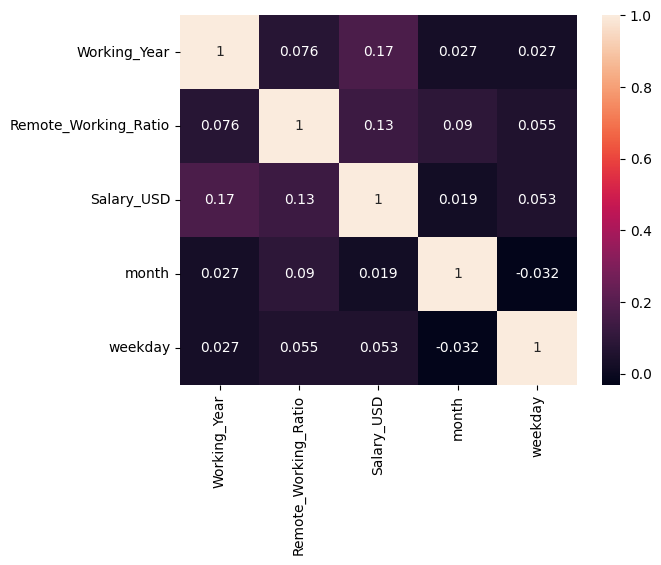

In [14]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(), annot=True) 
plt.show()